In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [17]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [24]:
df.shape

(30, 2)

Text(0, 0.5, 'Salary')

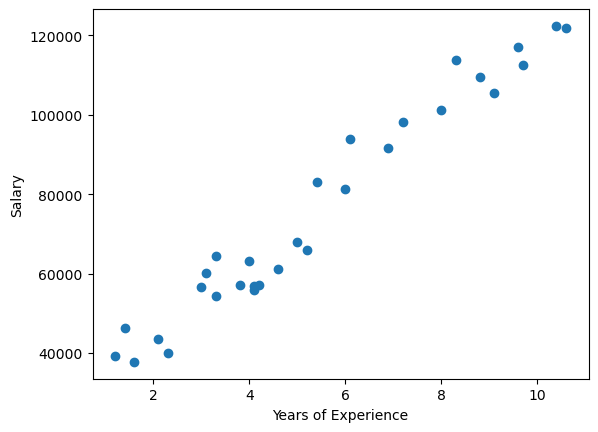

In [18]:
#Scatter Plot
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [19]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


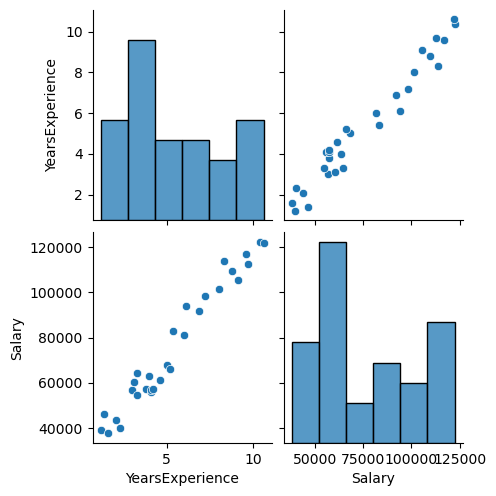

In [20]:
#Visualisation using Seaborn
import seaborn as sns

sns.pairplot(df)

In [21]:
#Independent and Dependent features

X = df[["YearsExperience"]]
y = df["Salary"]

In [22]:
#Train Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
X_train.shape

(21, 1)

In [25]:
#Standardising 

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [26]:
#Applying Simple Linear Regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)

In [27]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [28]:
print("Coefficient or Slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or Slope:  [25511.6333602]
Intercept:  71058.33333333333


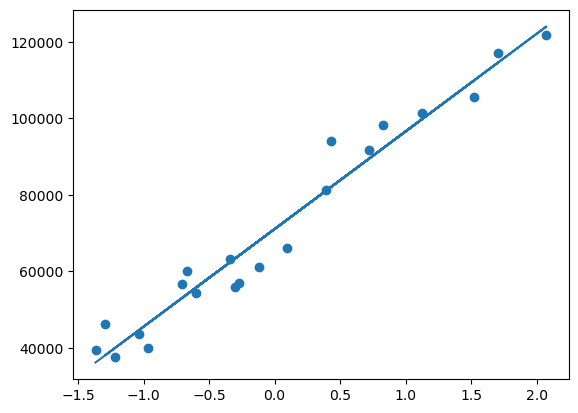

In [30]:
#Plotting best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [31]:
#Prediction on test data


y_pred = regression.predict(X_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [32]:
#Performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

37784662.46621307
5161.32871040018
6146.923007994575


In [33]:
#R Squared

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.9414466227178215

In [35]:
#Adjusted R2

1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.9330818545346532

In [38]:
#Using OLS

import statsmodels.api as sm

model = sm.OLS(X_train, y_train).fit()

prediction = model.predict(X_test)
print(prediction)

[ 7.77027099e-06  1.08675119e-07  5.48809349e-06  7.60725831e-07
 -2.66254041e-06 -1.84747702e-06  8.91135973e-06  6.30315688e-06
 -1.35843898e-06]


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.114
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              2.563
Date:                Fri, 19 Dec 2025   Prob (F-statistic):                       0.125
Time:                        11:13:17   Log-Likelihood:                         -28.531
No. Observations:                  21   AIC:                                      59.06
Df Residuals:                      20   BIC:                                      60.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary      4.453e-06   2.78e-06      1.601      0.125   -1.35e-06    1.03e-05
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.376
Skew:                           0.491   Prob(JB):                        0.503
Kurtosis:                       2.219   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(regression.predict(scalar.transform([[4]])))

[62341.85705777]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
